# Exploratory Analysis


In [ ]:
import os
import math
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from scipy import stats
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
data_path = Path("eda_house_prices.ipynb").parent.parent.resolve().parent
data_path

In [ ]:
data_files = Path(data_path, "data").resolve()
[os.path.basename(file) for file in data_files.glob('*.csv')]

In [ ]:
os.path.abspath("train.csv")

# Loading data

In [ ]:
df_train = pd.read_csv(os.path.join(data_path, "data", "train.csv"))
df_train.head(10)

In [ ]:
df_train.shape

In [ ]:
df_test = pd.read_csv(os.path.join(data_path, 'data', 'test.csv'))
df_train.head(10)

In [ ]:
df_test.shape

## Concatenating the Datasets

In [ ]:
df_concat = pd.concat([df_train, df_test], ignore_index=True)
df_concat.head(10)

In [ ]:
df_concat.shape

In [ ]:
df_concat.info()

# Renaming Columns

In [ ]:
df_concat.columns = map(str.lower, df_concat.columns)

In [ ]:
df_concat.columns

In [ ]:
drop_cols = ['id']
df_concat.drop(drop_cols, axis = 1, inplace = True)

In [ ]:
columns_null_values = df_concat.columns[df_concat.isnull().any()]

In [ ]:
df_concat[columns_null_values].isnull().sum()

In [ ]:
# square feet
lotarea = df_concat['lotarea']

for square_feet in (lotarea.max(), lotarea.min(), lotarea.mean(), lotarea.median()):
    print(f"Max value for Lot Area = {square_feet:.2f}", end=f"{' > '*5:5}")
    print(f"Square Feets = {square_feet / 10.764:.2f}m²")

In [ ]:
df_mszoning = df_concat.groupby('mszoning')
df_mszoning_desc = df_mszoning['saleprice'].describe()
df_mszoning_desc.round(2)

In [ ]:
df_concat[['lotarea', 'saleprice']].aggregate(['min', 'mean', 'max']).round(2)

In [ ]:
df_concat['saleprice'].hist()

In [ ]:
df_concat[['lotarea', 'overallqual']].aggregate(['min', 'mean', 'max']).round(2)

In [ ]:
df_overal_quality_desc = df_concat.groupby('overallqual')
df_overal_quality_desc = df_overal_quality_desc['saleprice'].describe()
df_overal_quality_desc.round(2)

In [ ]:
df_concat['overallqual'].hist()

In [ ]:
df_concat[['overallqual', 'saleprice']].corr()

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(df_concat.corr(), annot=True, center = 0.01, robust = True, linecolor = 'black', alpha = 0.9)
plt.show()

In [ ]:
hist, ax = plt.subplots(figsize = (12, 8))

ax = sns.distplot(df_concat['grlivarea'], kde = True, color = 'black', norm_hist = True)
ax.set_title("Living area")
plt.show()

In [ ]:
mu = df_concat['saleprice'].mean()
count_saleprice = df_concat['saleprice'].count()
somatoria = [((x - mu)**2) for x in df_concat['saleprice'] if not np.isnan(x)]
sigma = math.sqrt(sum(somatoria) / count_saleprice)
print(f"mu = {mu:.2f} ::: sigma = {sigma:.2f}")

# Slope Coefficient

## Finding the Beta value
### $\color{blue}\beta$=$\frac{\frac{\sum x.y}{n} - \frac{\sum x.\sum y}{n}}{\frac{\sum x^2}{n} - \left (\frac{\sum x}{n} \right)^2}$

In [100]:
df_sale_grlivarea = df_concat[['grlivarea', 'saleprice']]
df_sale_grlivarea.columns = ['X', 'Y']

In [101]:
df_sale_grlivarea.sort_values(by=['Y'])

,X,Y
495,720,34900.0
916,480,35311.0
968,968,37900.0
533,334,39300.0
30,1317,40000.0
710,729,52000.0
1337,693,52500.0
705,1092,55000.0
1325,796,55000.0
812,1044,55993.0


In [102]:
df_sale_grlivarea['X²'] = df_sale_grlivarea['X'].apply(lambda x: x ** 2)

C:\Users\viniciushc\AppData\Local\Temp\ipykernel_18468\4149935822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale_grlivarea['X²'] = df_sale_grlivarea['X'].apply(lambda x: x ** 2)


In [103]:
df_sale_grlivarea_notnull = df_sale_grlivarea[df_sale_grlivarea.Y.isnull() == False]

In [105]:
x = df_sale_grlivarea_notnull.X.to_list()
y = df_sale_grlivarea_notnull.Y.to_list()

In [112]:
sum_x_y = np.mean(np.array(x).sum() * np.array(y).sum())
sum_x_y

584441032185842.0

In [130]:
np.mean(np.array(x) * np.array(y))

303741109.8753425

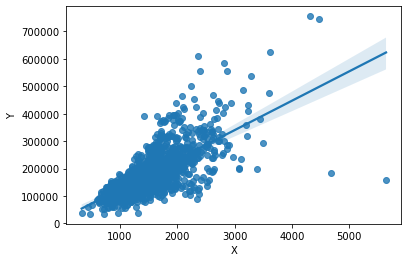

In [143]:
sns.regplot(x="X", y="Y", data=df_sale_grlivarea_notnull);

In [145]:
b, a = np.polyfit(x, y, deg=1)
b, a

(107.13035896582518, 18569.025856487286)

In [164]:
y_pred = [A_i + beta * xi for xi in x]

C:\Users\viniciushc\AppData\Local\Temp\ipykernel_18468\4144381740.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x, y_pred, 'k--', color='red')


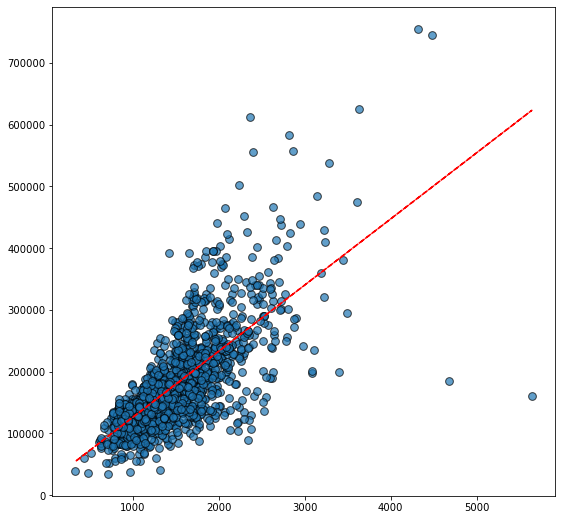

In [174]:
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

ax.plot(x, y_pred, 'k--', color='red')


In [136]:
mean_xy = np.mean(np.array(x) * np.array(y))
mean_x = np.mean(np.array(x))
mean_y = np.mean(np.array(y))
mean_x2 = np.mean(np.array(x) ** 2)
mean2_x = np.mean(np.array(x)) ** 2
m = (mean_xy - mean_x * mean_y) / (mean_x2 - mean2_x)
m

107.13035896582547

In [138]:
def beta_value(x: list, y: list) -> float:
    """Function to calculate the beta value from two variables"""

    assert len(x) == len(y), "Expected the same length for x and y."

    array_x = np.array(x)
    array_y = np.array(y)

    mean_xy = np.mean(array_x * array_y)
    meanx_meany = array_x.mean() * array_y.mean()
    mean_x2 = np.mean(array_x ** 2)
    mean2_x = np.mean(array_x) ** 2

    beta = (mean_xy - meanx_meany) / (mean_x2 - mean2_x)

    return beta


beta = beta_value(x, y)
print(f'The Beta given x and y is equal to: {beta}')

The Beta given x and y is equal to: 107.13035896582547


## Intercept

### 1. $A\;$=$\;\bar{y} - \beta . \bar{x}$
### OR 
### 2. $A\;$=$\;\frac{\sum y - \beta.\sum{x}}{n}$

In [139]:
y_bar = np.mean(y)
x_bar = np.mean(x)
A_i = y_bar - beta * x_bar
A_i

18569.025856486813

### Real X = 1710
### Real Y = 208500.0

720	

 34900.0
244659.23849107124

In [141]:
y_predict = A_i + beta * 1710
y_predict

201761.93968804835

In [125]:
df_sale_grlivarea_notnull['x.y'] = df_sale_grlivarea_notnull.X * df_sale_grlivarea_notnull.Y

C:\Users\viniciushc\AppData\Local\Temp\ipykernel_18468\3585740771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale_grlivarea_notnull['x.y'] = df_sale_grlivarea_notnull.X * df_sale_grlivarea_notnull.Y


In [126]:
df_sale_grlivarea_notnull

,X,Y,X²,x.y
0,1710,208500.0,2924100,3.565350e+08
1,1262,181500.0,1592644,2.290530e+08
2,1786,223500.0,3189796,3.991710e+08
3,1717,140000.0,2948089,2.403800e+08
4,2198,250000.0,4831204,5.495000e+08
5,1362,143000.0,1855044,1.947660e+08
6,1694,307000.0,2869636,5.200580e+08
7,2090,200000.0,4368100,4.180000e+08
8,1774,129900.0,3147076,2.304426e+08
9,1077,118000.0,1159929,1.270860e+08


In [127]:
mean_xy = np.mean(df_sale_grlivarea_notnull['x.y'])
mean_x = np.mean(df_sale_grlivarea_notnull['X'])
mean_y = np.mean(df_sale_grlivarea_notnull['Y'])
mean_x2 = np.mean(df_sale_grlivarea_notnull['X²'])
mean2_x = np.mean(df_sale_grlivarea_notnull['X']) ** 2
m = (mean_xy - mean_x * mean_y) / (mean_x2 - mean2_x)
m

107.13035896582547

107.13035896582547

In [93]:
b = (mean_x2 * mean_y - mean_x * mean_xy) / (mean_x2 - mean2_x)
b

18569.025856486955

In [95]:
y_predict = b + m * 1710
y_predict

201761.9396880485

In [64]:
y_predict = 18569.02585649 + 107.13035897 * 1256
y_predict

153124.75672280998

In [ ]:
y_hat = [A_i + (beta * xi) for xi in x]

In [ ]:
df_sale_grlivarea_notnull['y_hat'] = y_hat
df_sale_grlivarea_notnull

In [72]:
yi = df_sale_grlivarea_notnull.Y[0]
yii = df_sale_grlivarea_notnull.Y[1]

xi = df_sale_grlivarea_notnull.X[0]
xii = df_sale_grlivarea_notnull.X[1]
(yii - yi) / (xii - xi)

60.267857142857146

1710

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [53]:
y_array = np.array(y).reshape(-1, 1)
x_array = np.array(x).reshape(-1, 1)

In [54]:
# Train the model using the training sets
regr.fit(x_array, y_array)

LinearRegression()

In [59]:
regr.coef_

array([[107.13035897]])

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(np.array(y).reshape(-1, 1))

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(np.array(y).reshape(-1, 1), diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(np.array(y).reshape(-1, 1), diabetes_y_pred))

# Plot outputs
plt.scatter(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1), color="black")
plt.plot(np.array(x).reshape(-1, 1), diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
len(np.array(y).reshape(-1, 1))

In [ ]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

mae_sum = 0
for sale, x in zip(np.array(y).reshape(-1, 1), np.array(x).reshape(-1, 1)):
    prediction = lm.predict(np.array(x).reshape(-1, 1))
    mae_sum += abs(np.array(y).reshape(-1, 1) - np.array(df_sale_grlivarea_notnull['y_hat']).reshape(-1, 1))
mae = mae_sum / len(np.array(y).reshape(-1, 1))

print(mae)

In [ ]:
np.array(df_sale_grlivarea_notnull['y_hat']).reshape(-1, 1)

In [ ]:
np.array(x).reshape(-1, 1)

$x_{1,2}$=$\frac{-b\pm\sqrt{\color{Red}b^2-4ac}}{2a}$

In [ ]:
number_minus_mean = [number - mu for number in df_concat['saleprice'][:10]]
number_minus_mean

In [ ]:
number_powers_two = [number ** 2 for number in number_minus_mean]
number_powers_two

In [ ]:
TSS = sum(number_powers_two)
TSS

# $y_{i}$ = $\alpha$ + $\beta x_{i}$ + $\varepsilon_{i}$

In [ ]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [ ]:
y = df_concat['saleprice'][:10]
x = df_concat['grlivarea'][:10]

In [ ]:
slope, intercept, r, p, se = stats.linregress(x, y)

In [ ]:
print(" SLOPE = ", slope, "\n", "INTERCEPT = ", intercept, "\n", "R = ", r, "\n", "P = ", p, "\n", "SE = ", se)

In [ ]:
hist, ax = plt.subplots(figsize = (12, 8))

ax = sns.distplot(df_concat['saleprice'], kde = True, color = 'red', norm_hist = True, fit=norm)
ax.set_title("saleprice")
plt.legend([f'Normal distribution ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'])
plt.ylabel('Frequency')
plt.title('saleprice distribution')

plt.show()

In [ ]:
outlier = (df_concat['grlivarea'] > 4000) & (df_concat['saleprice'] < 300000)
outlier

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df_concat,
                x = 'grlivarea',
                y = 'saleprice',
                hue = outlier,
                alpha = 0.9,
                )

## DROP OUTLIERS

In [ ]:
drop_outliers = df_concat[outlier == True].index
df_concat.drop(drop_outliers, inplace=True)

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df_concat,
                x = 'grlivarea',
                y = 'saleprice',
                alpha = 0.9,
                )

In [ ]:
sns.jointplot('grlivarea', 'saleprice', data=df_concat, kind = 'kde')

In [ ]:
sns.lmplot(x ='grlivarea', y ='saleprice', data = df_concat,scatter_kws={'alpha':0.5},line_kws={'color':'red'} )

In [ ]:
df_concat['saleprice'][0]

In [ ]:
np.log10(df_concat['saleprice'][0])

In [ ]:
np.log1p(df_concat['saleprice'][0])

In [ ]:
np.log2(df_concat['saleprice'][0])

In [ ]:
x = df_concat['saleprice'][:10]
y = df_concat['grlivarea'][:10]

In [ ]:
slope_intercept = np.polyfit(x, y, 1)

print(slope_intercept)